In [68]:
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys


import mygabasic as ga
 
%aimport mygabasic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Open Loop

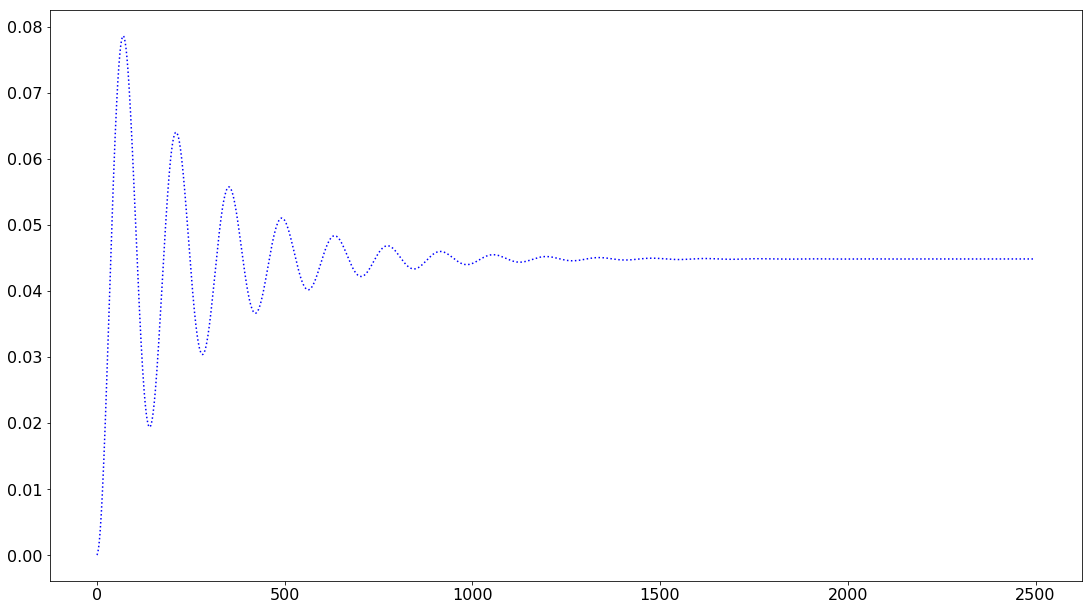

In [69]:


def zyz3():
    X = np.zeros(6)
    Y = np.zeros(6)
    Iterations = []
    Out = []
    for i in range(2500):
        X[0] = 1
        Y[0] = X[2]*4.475e-5 + X[1]*4.487e-5 + Y[2]*(-0.992) + Y[1]*1.99
        Iterations.append(i)
        Out.append(Y[0])
        X = np.roll(X, 1)
        Y = np.roll(Y, 1)
    return Iterations,Out



zyz3Ite,zyz3Out = zyz3()

plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(np.squeeze(zyz3Ite),
         np.squeeze(zyz3Out),
         'b:') 
plt.savefig('DynamicsOpenLoop001.pdf', format='pdf')
plt.show()

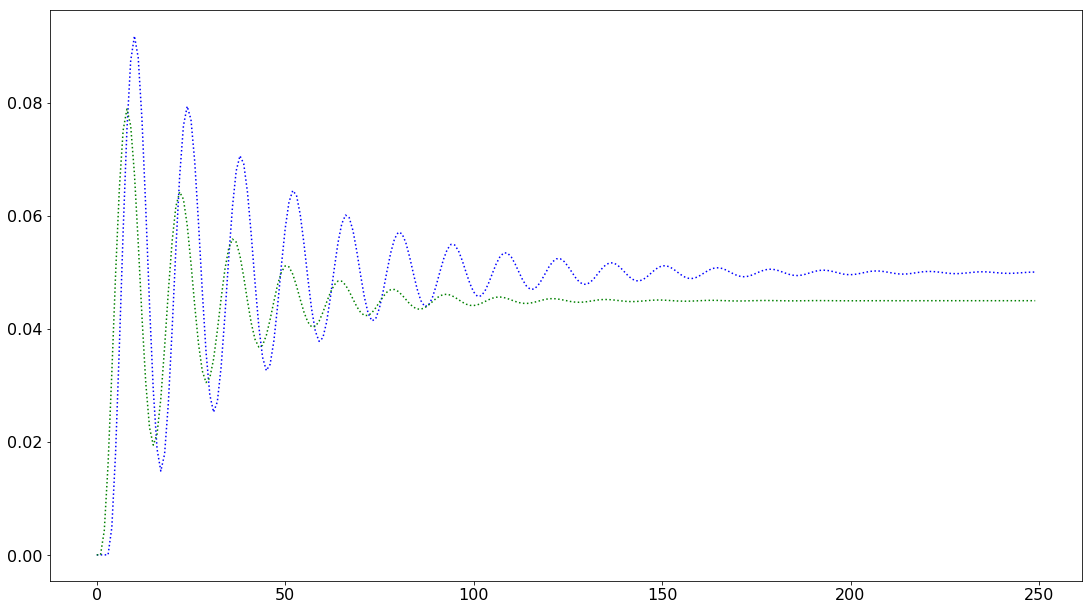

In [70]:


def zyz1():
    X = np.zeros(6)
    Y = np.zeros(6)
    Iterations = []
    Out = []
    for i in range(250):
        X[0] = 1
        Y[0] = X[4]*0.004837 + X[5]*0.004756 + Y[2]*(-0.9512) + Y[1]*1.759
        Iterations.append(i)
        Out.append(Y[0])
        X = np.roll(X, 1)
        Y = np.roll(Y, 1)
    return Iterations,Out

def zyz2():
    X = np.zeros(6)
    Y = np.zeros(6)
    Iterations = []
    Out = []
    for i in range(250):
        X[0] = 1
        Y[0] = X[3]*0.00419 + X[2]*0.00431 + Y[2]*(-0.9231) + Y[1]*1.734
        Iterations.append(i)
        Out.append(Y[0])
        X = np.roll(X, 1)
        Y = np.roll(Y, 1)
    return Iterations,Out

zyz1Ite,zyz1Out = zyz1()
zyz2Ite,zyz2Out = zyz2()
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(np.squeeze(zyz1Ite),
         np.squeeze(zyz1Out),
         'b:',
         np.squeeze(zyz2Ite),
         np.squeeze(zyz2Out),
         'g:') 
plt.savefig('DynamicsOpenLoop.pdf', format='pdf')
plt.show()

# Closed Loop

In [71]:
# def zyz1CloseLoop(P=0,Ki=18.52677354,Kd=0.30084384):
# def zyz1CloseLoop(P=0.03440869,Ki= 17.27241234,Kd=0):
# def zyz1CloseLoop(P=0,Ki=18.11434344,Kd=0.42478245):
# def zyz1CloseLoop(P=0,Ki=17.74563931,Kd=0):


def zyz1CloseLoop(P=0,Ki=18.62142993,Kd=0.31548802):
    UPPER_BOUND = 1000
    X = np.zeros(6)
    Y = np.zeros(6)
    SetPoint = 1
    Iterations = []
    # Proces Out
    Out = []
    # Control out sigma/component
    Count = []
    ErrSum = 0
    prevErr = 0
    Iout = 0
    # Inittial Control Out 
    err = SetPoint - Y[0]
    ErrSum = ErrSum + ((err*err)/2)
    Pout = err*P
    Dout = 0
    prevErr = err
    Iout = Iout + err*0.1*Ki
    X[0] = Pout + Dout + Iout
    for i in range(250):
        Y[0] = X[4]*0.004837 + X[5]*0.004756 + Y[2]*(-0.9512) + Y[1]*1.759
        # Y[0] = X[2]*4.475e-5 + X[1]*4.487e-5 + Y[2]*(-0.992) + Y[1]*1.99
        if Y[0] > UPPER_BOUND:
            Y[0] = UPPER_BOUND
        Iterations.append(i)
        Out.append(Y[0])
        Count.append(Dout)
        err = SetPoint - Y[0]
        ErrSum = ErrSum + ((err*err)/2)
        # Over peak penalization
        if err < 0:
            ErrSum = ErrSum + ((err*err)*1000)   
        Pout = err*P
        Dout = ((err - prevErr)/0.1)*Kd
        prevErr = err
        Iout = Iout + err*0.1*Ki
        Y = np.roll(Y, 1)
        X = np.roll(X, 1)
        X[0] = Pout + Dout + Iout
        
    return Iterations,Out,Count,ErrSum

def wrappedzyz1CloseLoop(fevalMtx):
    _,_,_,new = zyz1CloseLoop(P=fevalMtx[0][0],Ki=fevalMtx[1][0],Kd=fevalMtx[2][0]);
    return new

def zyz1CloseLoopBinString(binString):
    codeLen = 32 
    cromoSize = binString.shape[0]
    col = int(cromoSize/codeLen)
    splitPop = binString.reshape((col,codeLen))
    # print(splitPop)
    fevalMtx = [[ga.gdeco(bitlist = dim, minVal = 0, maxVal = 600, codeLen = codeLen)] for dim in splitPop]
    # print(fevalMtx)
    rval =  wrappedzyz1CloseLoop(fevalMtx)
    # print(rval)
    return rval

7.175023557424512


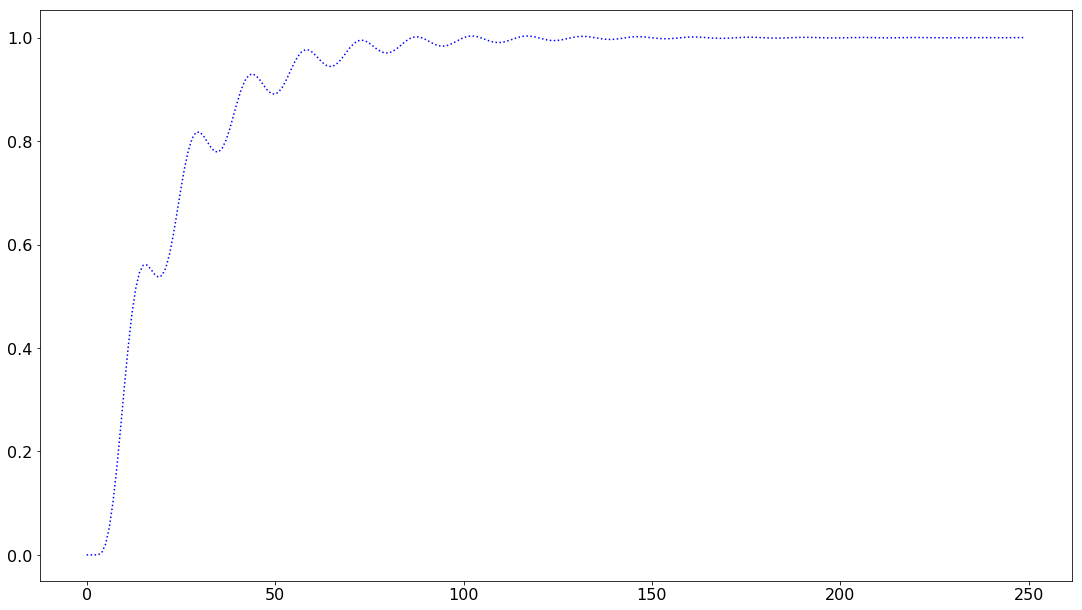

In [85]:
Iterations,Out,Count,ErrSum = zyz1CloseLoop(P=1.69810373e-03,Ki=8.72315609e+00,Kd=1.00730010e-01)

print(ErrSum)
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(np.squeeze(Iterations),
         np.squeeze(Out),
         'b:')
plt.savefig('DynamicHillClimbinfOpenLoop.pdf', format='pdf')
plt.show()

In [54]:
UPPER_VAL_LIMIT = 600
def rdmGauss(sigma = 0.2, mu = 0):
    return np.random.normal(mu, sigma, 1)

# http://mathworld.wolfram.com/RandomNumber.html
# https://stackoverflow.com/questions/918736/random-number-generator-that-produces-a-power-law-distribution
def rdmSimetricPoerLow(x1 = 3, x0 = 0.1, alpha = -1.5):
    y = np.random.uniform(0,1,1)
    x = math.pow((math.pow(x1, (alpha + 1)) - math.pow(x0, (alpha + 1)))*y + math.pow(x0, (alpha + 1)),(1/(alpha+1)))
    sign = np.random.uniform(0,1,1)
    return x if sign > 0.5 else -x

def min_HillClimbing(fevalMtx,sigma = 0.7, function = None):
    Y = np.copy(fevalMtx)
    for y in Y:
        y[0] = y[0] + rdmGauss(sigma = sigma)
        
        if y[0] < 0 :
            y[0] = 0
        elif y[0] > UPPER_VAL_LIMIT:
            y[0] = UPPER_VAL_LIMIT
    
    _,_,_,prev = function(P=fevalMtx[0][0],Ki=fevalMtx[1][0],Kd=fevalMtx[2][0])
    _,_,_,new = function(P=Y[0][0],Ki=Y[1][0],Kd=Y[2][0]);
    
    if new <= prev:
        return new, Y
    else:
        return prev, fevalMtx
    
    
def min_PowerLaw(fevalMtx,  x1 = 20, x0 = 0.5, alpha = -1.5, function = None):
    Y = np.copy(fevalMtx)
    for y in Y:
        y[0] = y[0] + rdmSimetricPoerLow( x1 = x1, x0 = x0, alpha = alpha)
        
        if y[0] < 0 :
            y[0] = 0
        elif y[0] > UPPER_VAL_LIMIT:
            y[0] = UPPER_VAL_LIMIT

    _,_,_,prev = function(P=fevalMtx[0][0],Ki=fevalMtx[1][0],Kd=fevalMtx[2][0])
    _,_,_,new = function(P=Y[0][0],Ki=Y[1][0],Kd=Y[2][0]);
    
    if new <= prev:
        return new, Y
    else:
        return prev, fevalMtx
    
    
def sa(energyfunc, initials, epochs, tempfunc, iterfunc, proposalfunc,sigma = 0.75,x1 = 20,x0 = 0.5,alpha = -1.5):
    # out plot
    OUT_List_Simanneal = []
    Iterations = []
    
    accumulator=[]
    best_solution = old_solution = initials['solution']
    T=initials['T']
    length=initials['length']
    _,_,_,best_energy = energyfunc(P=old_solution[0][0],Ki=old_solution[1][0],Kd=old_solution[2][0])
    _,_,_,old_energy = energyfunc(P=old_solution[0][0],Ki=old_solution[1][0],Kd=old_solution[2][0])
    accepted=0
    total=0
    
    best_index=total
    best_temp=T
    
    
    for index in range(epochs):
        # print("Epoch", index)
        if index > 0:
            T = tempfunc(T)
            length=iterfunc(length)
            sys.stdout.write("\r Temperature " + str(T))
            sys.stdout.flush()
        # print("Temperature", T, "Length", length)
        for it in range(length):
            Iterations.append(total)
            OUT_List_Simanneal.append(old_energy)
            total+=1
            new_solution = np.copy(old_solution)
            for y in new_solution:
                if proposalfunc == 'rdmGauss':
                    y[0] = y[0] + rdmGauss(sigma = sigma)
                else:
                    y[0] = y[0] + rdmSimetricPoerLow(x1 = x1, x0 = x0, alpha = alpha)
                if y[0] < 0 :
                    y[0] = 0
                elif y[0] > UPPER_VAL_LIMIT:
                    y[0] = UPPER_VAL_LIMIT
                    
            # new_solution = proposalfunc(old_solution)
            _,_,_,new_energy = energyfunc(P=new_solution[0][0],Ki=new_solution[1][0],Kd=new_solution[2][0])
            # Use a min here as you could get a "probability" > 1
            alphaLoc = min(1, np.exp((old_energy - new_energy)/T))
            if ((new_energy < old_energy) or (np.random.uniform() < alphaLoc)):
                # Accept proposed solution
                accepted+=1
                accumulator.append((T, new_solution, new_energy))
                #OUT_List_Simanneal.append(new_energy)
                if new_energy < best_energy:
                    # Replace previous best with this one
                    best_energy = new_energy
                    best_solution = new_solution
                    best_index=total
                    best_temp=T
                old_energy = new_energy
                old_solution = new_solution
            else:
                # Keep the old stuff
                accumulator.append((T, old_solution, old_energy))
                #OUT_List_Simanneal.append(old_energy)
    
    best_meta=dict(index=best_index, temp=best_temp)
    # print("frac accepted", accepted/total, "total iterations", total, 'bmeta', best_meta)
    return best_meta, best_solution, best_energy, accumulator, OUT_List_Simanneal, Iterations

# Hill Climbing

 Iteration 49

mean: 1.0123950380638859e+71
std: 7.086450388888922e+71
median: 190624098037.11774
min: 6.823711512008611
max: 5.061754771484178e+72
[[0.        ]
 [9.49336924]
 [0.        ]]
6.823711512008611


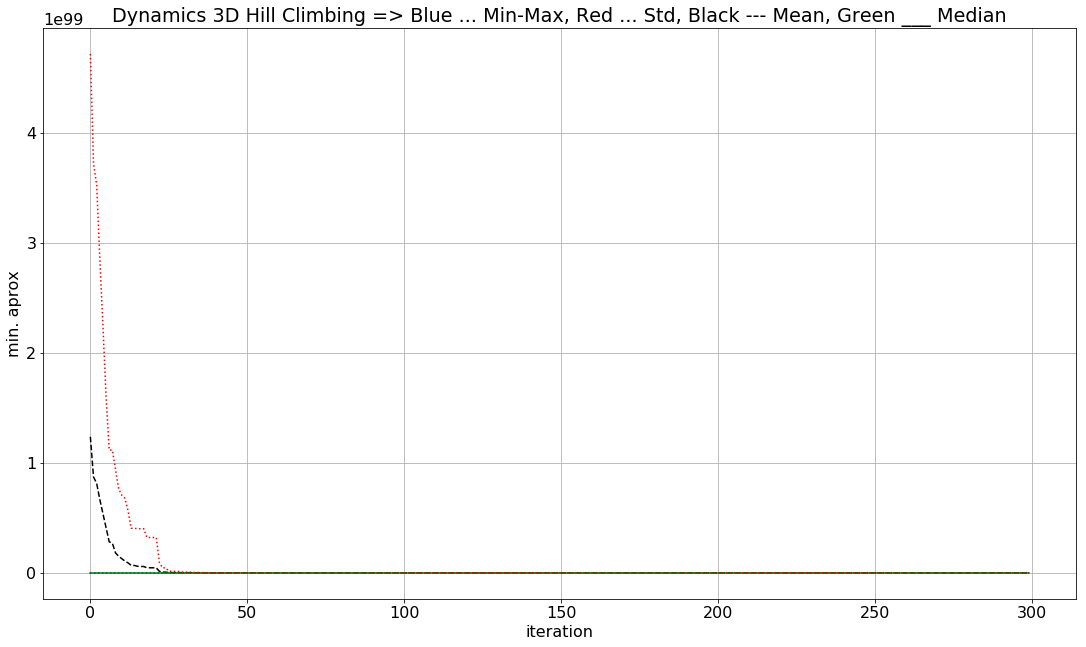

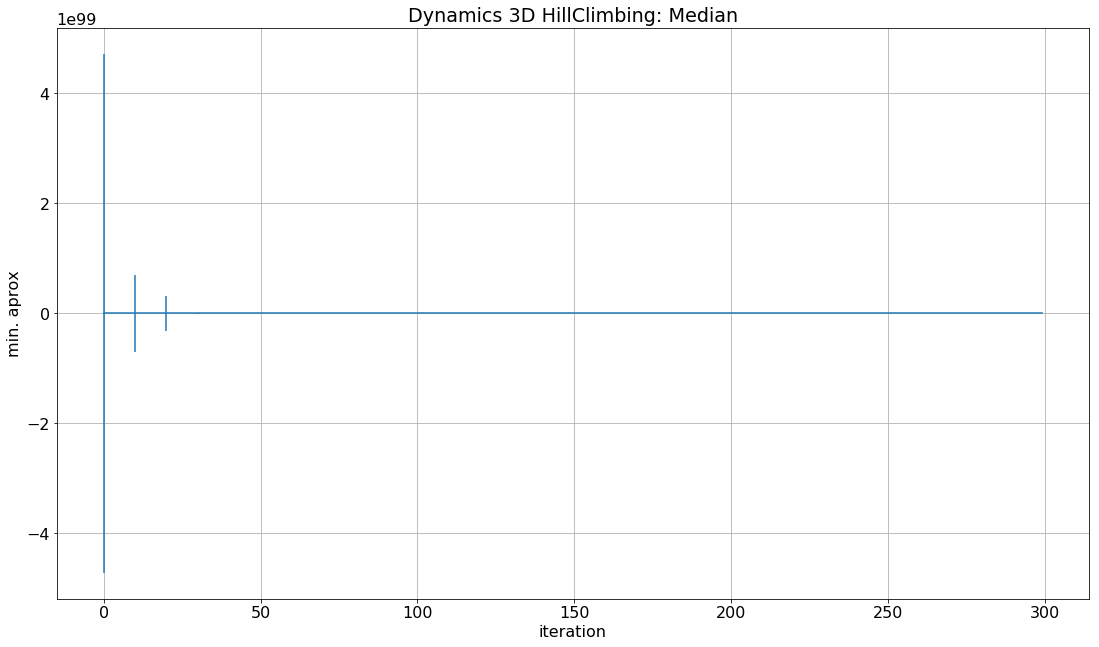

In [43]:
Best_List = []
valVectorSize = 3

if valVectorSize == 3:
    iterSize = 300
    SimannealItrSize = 8
else:
    iterSize = 10000
    SimannealItrSize = 19
    
repetitions = 50
OUT_Matrix = np.zeros((repetitions, iterSize))
iniRef = 100000000
bestVal =   np.zeros((3, 1))  

for j in range(0, repetitions):
    Iterations = []
    
    fevalRdm =  np.random.uniform(low=0, high=600, size=(valVectorSize, 1))
    delta = np.zeros((valVectorSize, 1))
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    for i in range(0, iterSize):
        OUT, fevalRdm = min_HillClimbing(fevalRdm, sigma = 7, function = zyz1CloseLoop)
        OUT_Matrix[j][i] = OUT
        Iterations.append(i)
    
    if OUT < iniRef:
        bestVal = np.copy(fevalRdm)
        iniRef = OUT
        
    Best_List.append(OUT)
    
    
print('\n')
print('mean: ' + str(np.mean(Best_List)))
print('std: ' + str(np.std(Best_List)))
print('median: ' + str(np.median(Best_List)))
print('min: ' + str(np.amin(Best_List)))
print('max: ' + str(np.amax(Best_List)))
print(bestVal)
print(iniRef)


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(
         np.squeeze(Iterations),
         np.squeeze(np.amin(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.mean(OUT_Matrix, axis=0)),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(np.median(OUT_Matrix, axis=0)),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(np.std(OUT_Matrix, axis=0)),
         'r:',)


plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D Hill Climbing => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsHillClimbing_3d.pdf', format='pdf')
plt.show()


# Standard Deviation Plot
Ala = np.std(OUT_Matrix, axis=0)
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:10] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, np.median(OUT_Matrix, axis=0), truncated)
plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D HillClimbing: Median")
plt.grid()
plt.savefig('DynamicsHillClimbingStd_2d.pdf', format='pdf')
plt.show()

# Hill Climbing with Power Law

 Iteration 29

mean: 4.547210540810431e+60
std: 1.7379176966849137e+61
median: 178471167396.55493
min: 6.895596137279672
max: 8.210102664459553e+61
[[0.        ]
 [9.18859908]
 [0.        ]]
6.895596137279672


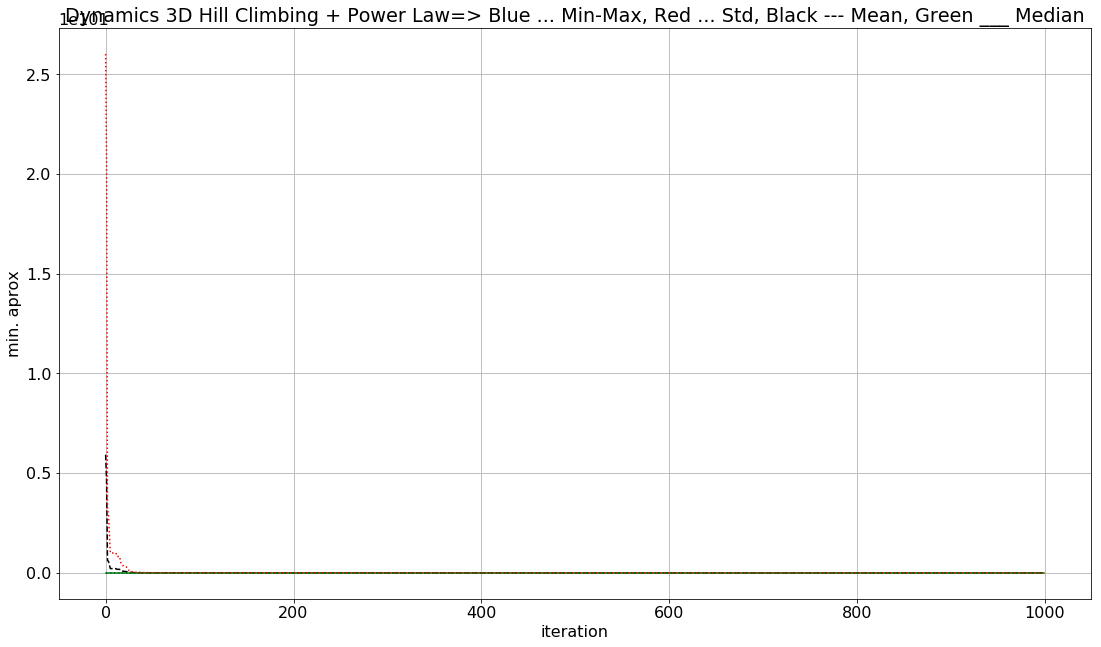

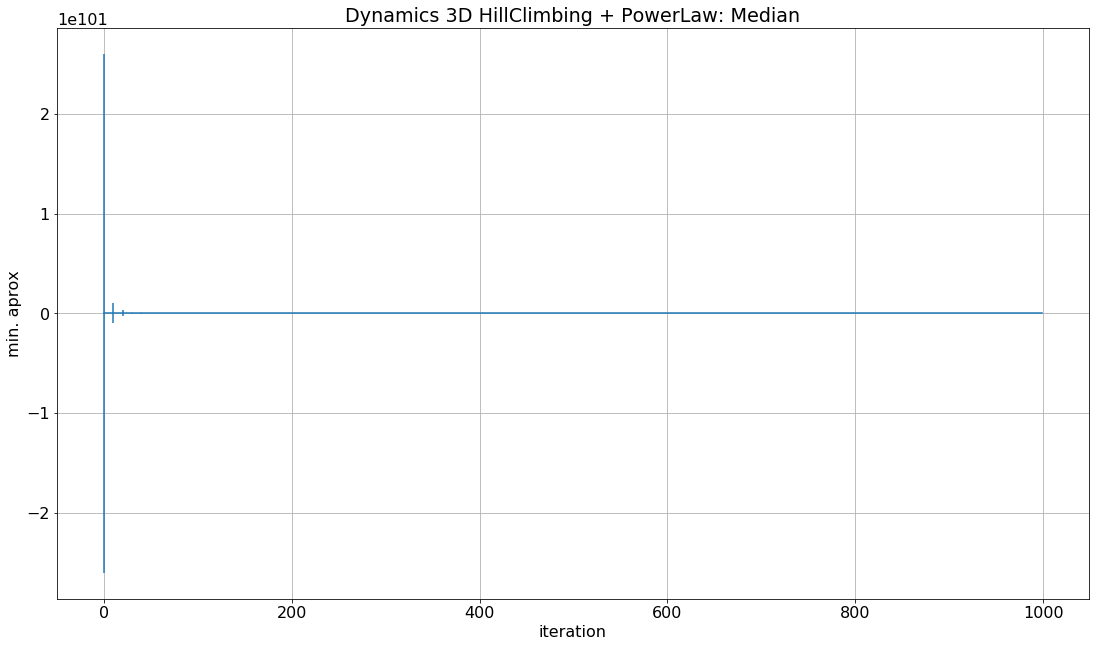

In [60]:
Best_List = []
valVectorSize = 3

if valVectorSize == 3:
    iterSize = 1000
    SimannealItrSize = 8
else:
    iterSize = 10000
    SimannealItrSize = 19
    
repetitions = 30
OUT_Matrix = np.zeros((repetitions, iterSize))
iniRef = 100000000
bestVal =   np.zeros((3, 1))  

for j in range(0, repetitions):
    Iterations = []
    
    fevalRdm =  np.random.uniform(low=0, high=600, size=(valVectorSize, 1))
    delta = np.zeros((valVectorSize, 1))
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    for i in range(0, iterSize):
        OUT, fevalRdm = min_PowerLaw(fevalRdm, x1 = 10, x0 = 1, alpha = -2, function = zyz1CloseLoop)
        OUT_Matrix[j][i] = OUT
        Iterations.append(i)
    
    if OUT < iniRef:
        bestVal = np.copy(fevalRdm)
        iniRef = OUT
        
    Best_List.append(OUT)
    
    
print('\n')
print('mean: ' + str(np.mean(Best_List)))
print('std: ' + str(np.std(Best_List)))
print('median: ' + str(np.median(Best_List)))
print('min: ' + str(np.amin(Best_List)))
print('max: ' + str(np.amax(Best_List)))
print(bestVal)
print(iniRef)


# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(
         np.squeeze(Iterations),
         np.squeeze(np.amin(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.mean(OUT_Matrix, axis=0)),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(np.median(OUT_Matrix, axis=0)),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(np.std(OUT_Matrix, axis=0)),
         'r:',)


plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D Hill Climbing + Power Law=> Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsHillClimbingPowerLaw_3d.pdf', format='pdf')
plt.show()


# Standard Deviation Plot
Ala = np.std(OUT_Matrix, axis=0)
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:10] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, np.median(OUT_Matrix, axis=0), truncated)
plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D HillClimbing + PowerLaw: Median")
plt.grid()
plt.savefig('DynamicsHillClimbingPowerLawStd_2d.pdf', format='pdf')
plt.show()

# Simulated annealing + Normal
## 3D

 Temperature 0.78125

mean: 129112997152.3495
std: 69267039086.07857
median: 122074129646.77454
min: 6.814923245252167
max: 204270668512.0955
[[0.       ]
 [9.6509794]
 [0.       ]]
6.814923245252167


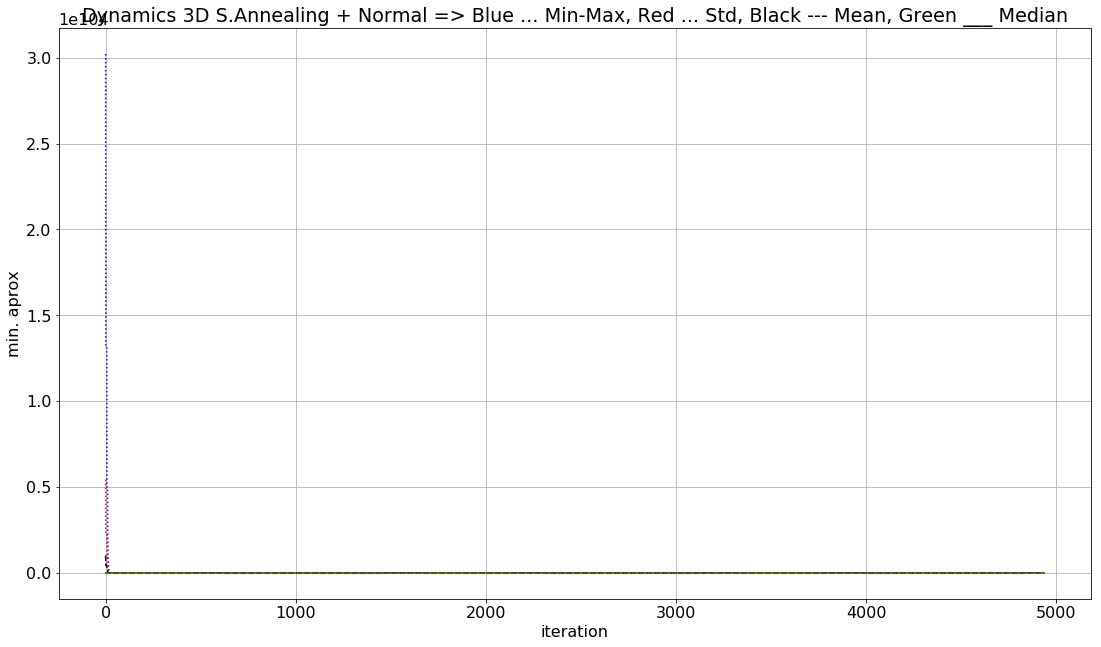

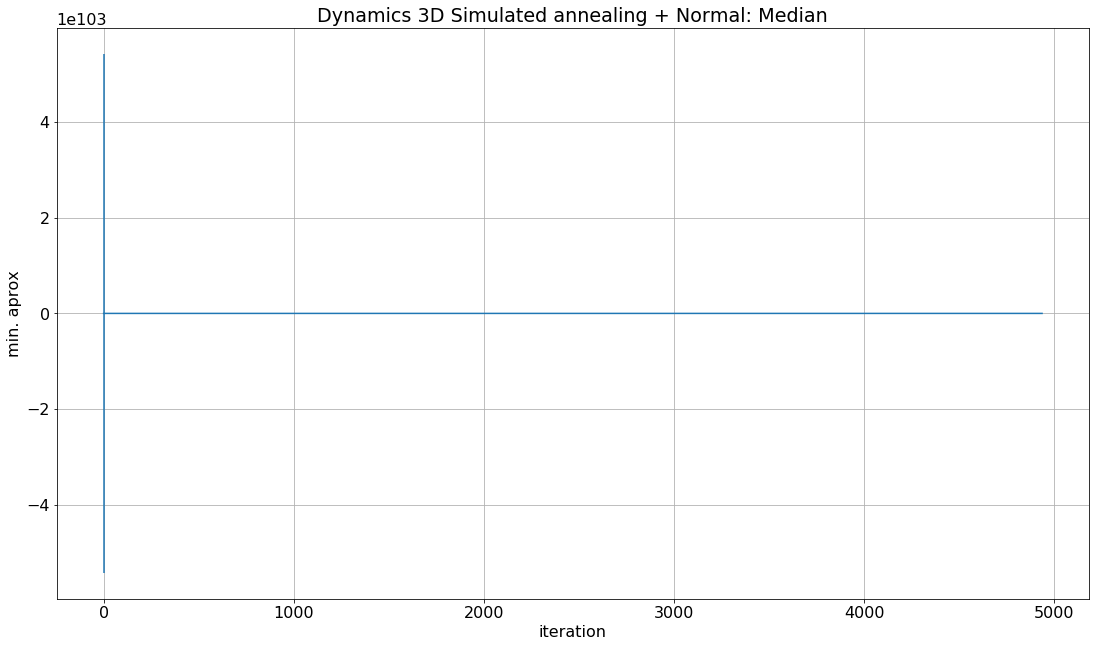

In [74]:
Best_List = []
valVectorSize = 3

if valVectorSize == 3:
    iterSize = 100
    SimannealItrSize = 8
else:
    iterSize = 10000
    SimannealItrSize = 19
    

iniRef = 100000000
bestVal =   np.zeros((3, 1))  

repetitions = 30
OUT_Matrix = None
OutIniFlag = False

tf = lambda t: 0.5*t #temperature function
itf = lambda length: math.ceil(1.5*length) #iteration function

for j in range(0, repetitions):
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    fevalRdm =  np.random.uniform(low=0, high=UPPER_VAL_LIMIT, size=(valVectorSize, 1))
    inits=dict(solution=fevalRdm, length=100, T=100)
    OUT_List_Simanneal_Tmp = []
    bmeta, bs, be, out, OUT_List_Simanneal, Iterations = sa(zyz1CloseLoop,
                                                                inits,
                                                                SimannealItrSize,
                                                                tf,
                                                                itf,
                                                                'rdmGauss',
                                                                sigma = 7,
                                                                x1 = 4,
                                                                x0 = 0.1,
                                                                alpha = -1.5)
    if be < iniRef:
        bestVal = np.copy(bs)
        iniRef = be
    
    Best_List.append(be)
    if OutIniFlag == False:
        OutIniFlag = True
        OUT_Matrix = np.asarray(OUT_List_Simanneal).reshape(1,-1)
    else:
        OUT_Matrix = np.concatenate((OUT_Matrix, np.asarray(OUT_List_Simanneal).reshape(1,-1)), axis=0)
    
    
print('\n')
print('mean: ' + str(np.mean(Best_List)))
print('std: ' + str(np.std(Best_List)))
print('median: ' + str(np.median(Best_List)))
print('min: ' + str(np.amin(Best_List)))
print('max: ' + str(np.amax(Best_List)))
print(bestVal)
print(iniRef)

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(np.amax(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.amin(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.mean(OUT_Matrix, axis=0)),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(np.median(OUT_Matrix, axis=0)),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(np.std(OUT_Matrix, axis=0)),
         'r:',)


plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D S.Annealing + Normal => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsSAnnealNrm_2d.pdf', format='pdf')
plt.show()


# Standard Deviation Plot
Ala = np.std(OUT_Matrix, axis=0)
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:50] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, np.median(OUT_Matrix, axis=0), truncated)
plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D Simulated annealing + Normal: Median")
plt.grid()
plt.savefig('DynamicsSAnnealNrmStd_2d.pdf', format='pdf')
plt.show()

# Simulated annealing + Power Law
## 3D

 Temperature 0.78125

mean: 5.416421032115812e+44
std: 2.916831991703729e+45
median: 173471407424.61017
min: 99275419649.76318
max: 1.6249263093258542e+46
[[0.]
 [0.]
 [0.]]
100000000


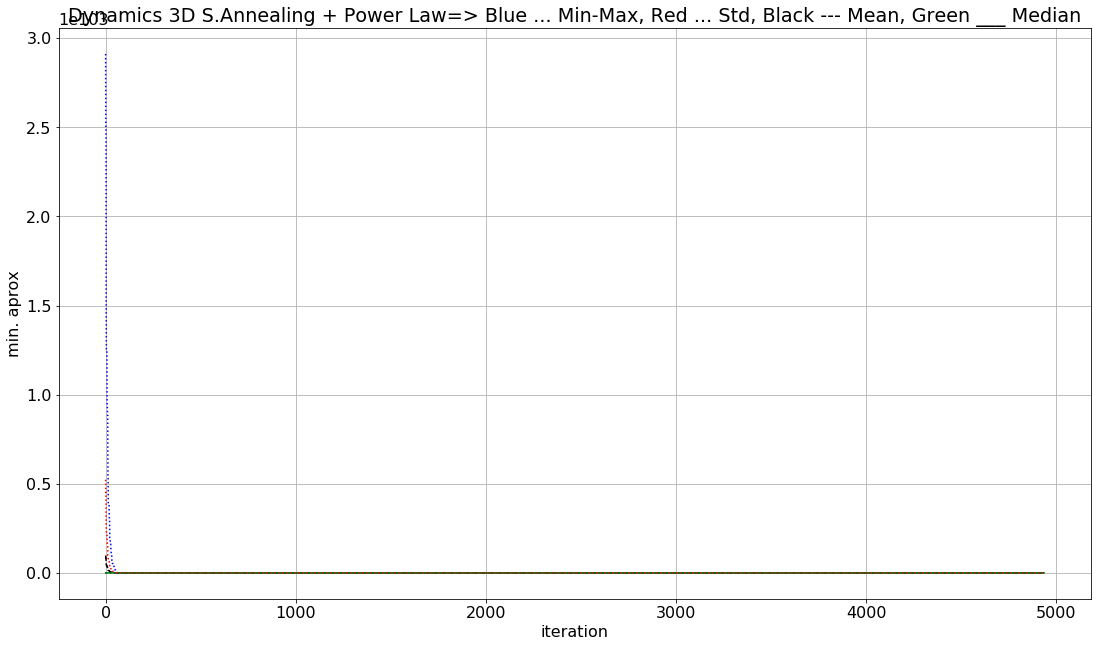

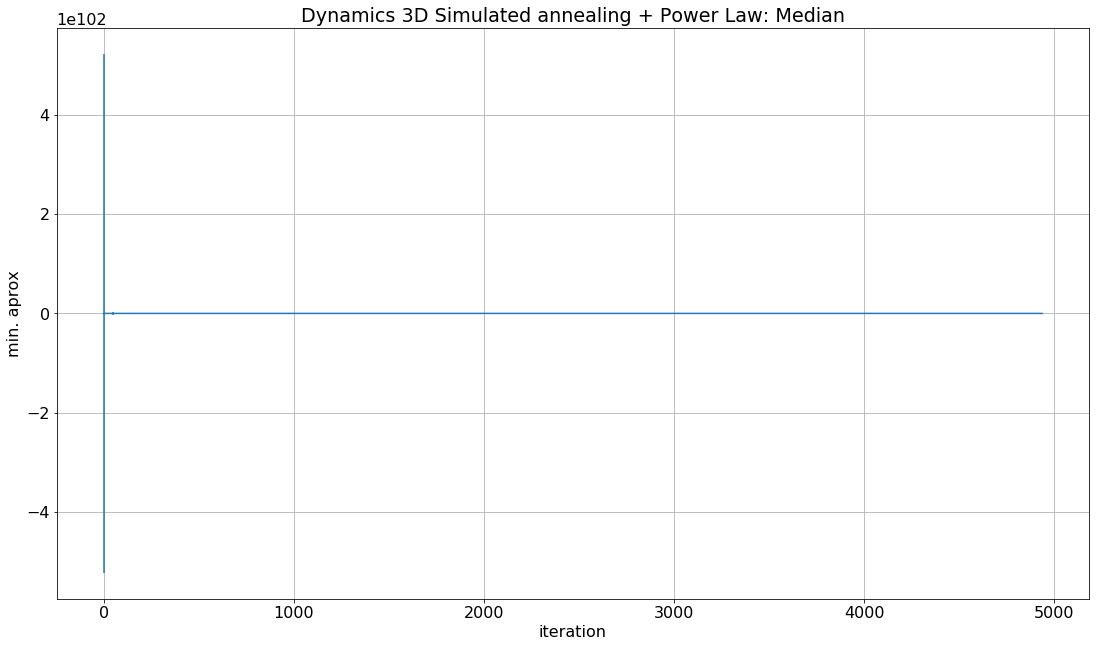

In [78]:
Best_List = []
valVectorSize = 3

if valVectorSize == 3:
    iterSize = 100
    SimannealItrSize = 8
else:
    iterSize = 10000
    SimannealItrSize = 19
    

iniRef = 100000000
bestVal =   np.zeros((3, 1))  

repetitions = 30
OUT_Matrix = None
OutIniFlag = False

tf = lambda t: 0.5*t #temperature function
itf = lambda length: math.ceil(1.5*length) #iteration function

for j in range(0, repetitions):
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    fevalRdm =  np.random.uniform(low=0, high=UPPER_VAL_LIMIT, size=(valVectorSize, 1))
    inits=dict(solution=fevalRdm, length=100, T=100)
    OUT_List_Simanneal_Tmp = []
    bmeta, bs, be, out, OUT_List_Simanneal, Iterations = sa(zyz1CloseLoop,
                                                                inits,
                                                                SimannealItrSize,
                                                                tf,
                                                                itf,
                                                                'rdmSimetricPoerLow',
                                                                sigma = 7,
                                                                x1 = 8,
                                                                x0 = 1,
                                                                alpha = -1.5)
    if be < iniRef:
        bestVal = np.copy(bs)
        iniRef = be
    
    Best_List.append(be)
    if OutIniFlag == False:
        OutIniFlag = True
        OUT_Matrix = np.asarray(OUT_List_Simanneal).reshape(1,-1)
    else:
        OUT_Matrix = np.concatenate((OUT_Matrix, np.asarray(OUT_List_Simanneal).reshape(1,-1)), axis=0)
    
    
print('\n')
print('mean: ' + str(np.mean(Best_List)))
print('std: ' + str(np.std(Best_List)))
print('median: ' + str(np.median(Best_List)))
print('min: ' + str(np.amin(Best_List)))
print('max: ' + str(np.amax(Best_List)))
print(bestVal)
print(iniRef)

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(np.amax(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.amin(OUT_Matrix, axis=0)),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(np.mean(OUT_Matrix, axis=0)),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(np.median(OUT_Matrix, axis=0)),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(np.std(OUT_Matrix, axis=0)),
         'r:',)


plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D S.Annealing + Power Law=> Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsSAnnealPlw_2d.pdf', format='pdf')
plt.show()


# Standard Deviation Plot
Ala = np.std(OUT_Matrix, axis=0)
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:50] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, np.median(OUT_Matrix, axis=0), truncated)
plt.ylabel('min. aprox')
plt.xlabel('iteration')
plt.title("Dynamics 3D Simulated annealing + Power Law: Median")
plt.grid()
plt.savefig('DynamicsSAnnealPlwStd_2d.pdf', format='pdf')
plt.show()

# Genetic Algorithms

## TournamentGA 3d

 Iteration 999

Last fit info______
Last fit mean: 3.62894581395163e+88
Last fit std: 1.6119960198383435e+89
Last fit median: 6.944680906604788
Last fit min: 6.815049771323331
Last fit max: 7.83066794252095e+89
Last Pop info______
Last Pop mean: [ 9.56420079 29.57907102 23.03450667]
Last Pop std: [42.59752783 61.92662192 73.02540581]
Last Pop median: [1.79512426e-05 9.66811327e+00 5.09899110e-06]
Last Pop min: [6.98491931e-08 2.92969938e-01 6.98491931e-08]
Last Pop max: [304.68750126 314.35547015 300.00000573]
6.815049771323331
[6.98491931e-08 9.66796994e+00 6.98491931e-08]


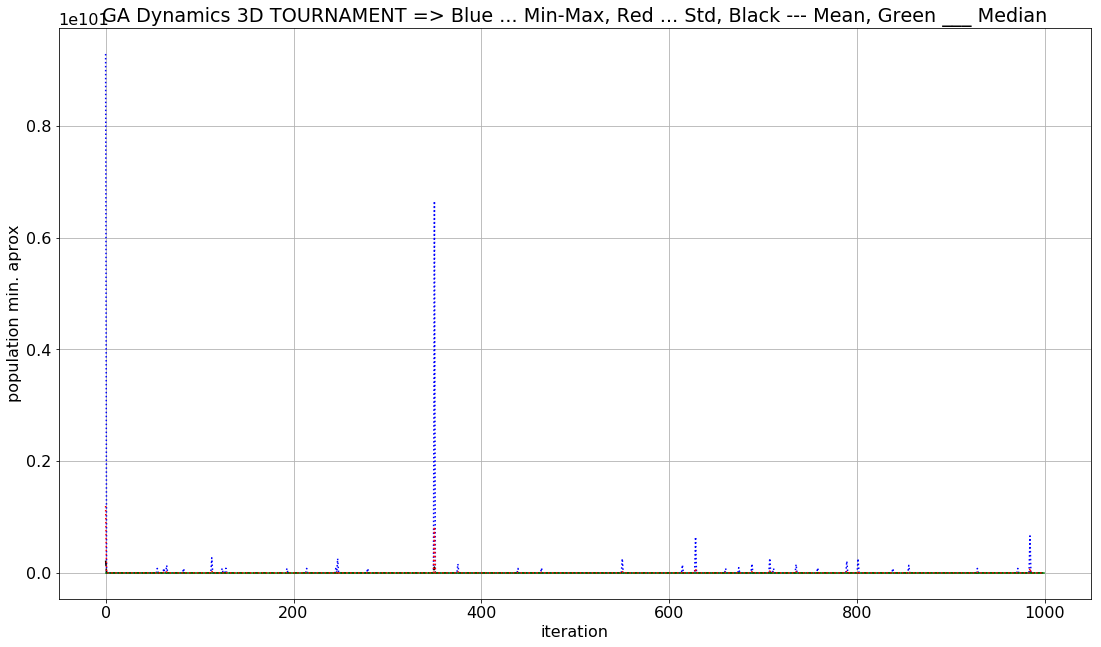

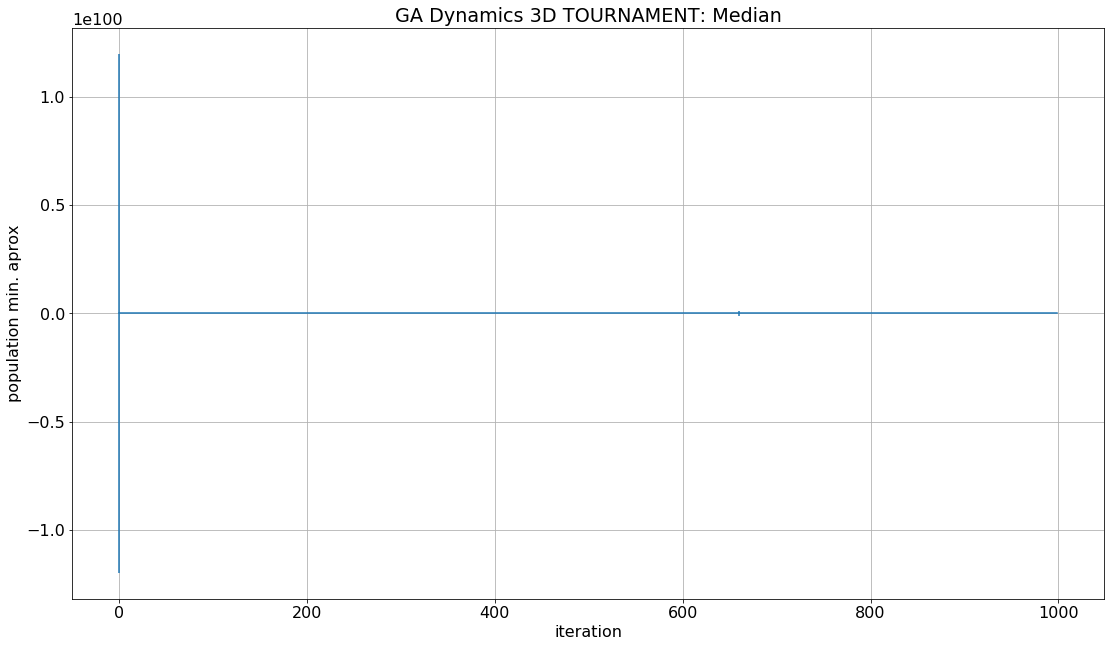

In [79]:
# Generate population
N = 64
minVal = 0
maxVal = UPPER_VAL_LIMIT
codeLen = 32
genQty = 3
d = codeLen * genQty
iterations = 1000
matingPercent = 0.7
mutaPercent = 0.03
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,
                                  minVal = minVal,
                                  maxVal = maxVal,
                                  codeLen = codeLen,
                                  genQty = genQty,
                                  funct = wrappedzyz1CloseLoop)

    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))

print(fitList[np.argmin(fitList)])
print(fitVal[np.argmin(fitList)])
# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D TOURNAMENT => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsTournamentGA_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:20] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D TOURNAMENT: Median")
plt.grid()
plt.savefig('DynamicsTournamentGAStd_3d.pdf', format='pdf')
plt.show()

## RankWeightingGA 3d

 Iteration 999

Last fit info______
Last fit mean: 1.2752115606957467e+89
Last fit std: 9.431334669079883e+89
Last fit median: 48.248646316605466
Last fit min: 7.175023559279089
Last fit max: 7.592438871333372e+90
Last Pop info______
Last Pop mean: [11.99376254 25.17608336 18.15067735]
Last Pop std: [29.86049541 64.14611144 60.02952524]
Last Pop median: [0.3679089  8.72122154 0.1027571 ]
Last Pop min: [0.00137582 0.54642207 0.02760922]
Last Pop max: [150.38621948 380.50772289 301.19538121]
7.175023559279089
[1.69810373e-03 8.72315609e+00 1.00730010e-01]


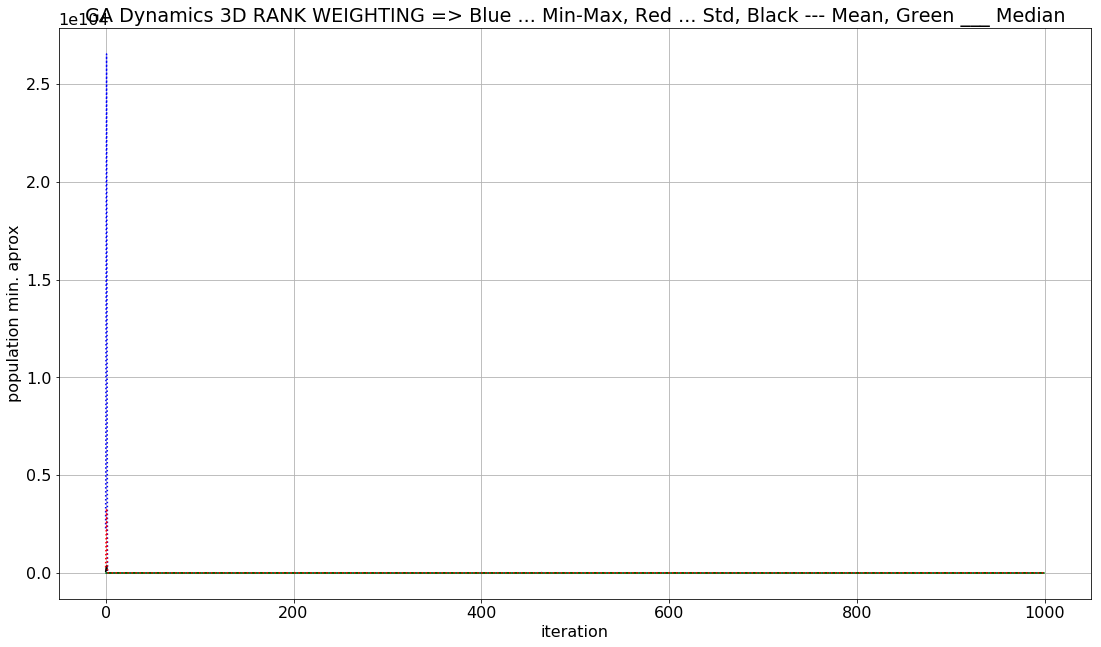

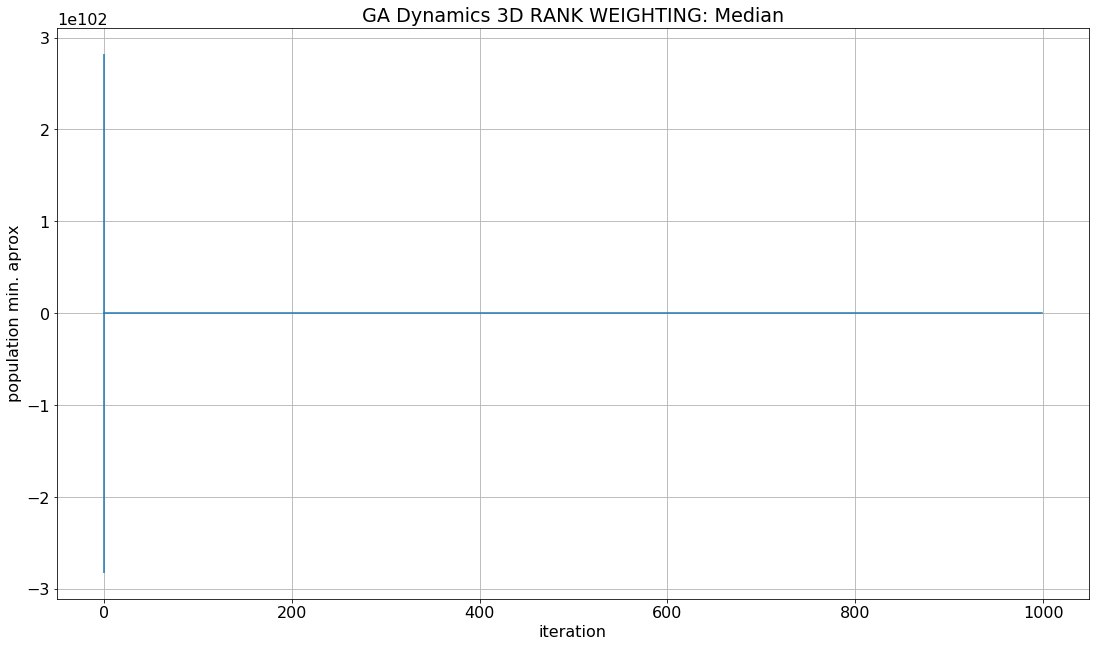

In [80]:
# Generate population
N = 64
minVal = 0
maxVal = UPPER_VAL_LIMIT
codeLen = 32
genQty = 3
d = codeLen * genQty
iterations = 1000
matingPercent = 0.7
mutaPercent = 0.03
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,
                                  minVal = minVal,
                                  maxVal = maxVal,
                                  codeLen = codeLen,
                                  genQty = genQty,
                                  funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    ordPop,ordFitVal,ordFitLst,rankWeighting = ga.rankWeighting(fitList,fitVal,Pop,keep = 1)
    pselect = ga.weightedSelection(ordPop, rankWeighting, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))

print(fitList[np.argmin(fitList)])
print(fitVal[np.argmin(fitList)]) 

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D RANK WEIGHTING => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsRankWeightingGA_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:20] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D RANK WEIGHTING: Median")
plt.grid()
plt.savefig('DynamicsRankWeightingGAStd_3d.pdf', format='pdf')
plt.show()

## CostWeightingGA 3d 

 Iteration 999

Last fit info______
Last fit mean: 8.58158228692388e+69
Last fit std: 9.670952087307744e+70
Last fit median: 160499079786.29327
Last fit min: 114765555285.04675
Last fit max: 1.0984425327262566e+72
Last Pop info______
Last Pop mean: [200.9288675  167.3569164   18.21093722]
Last Pop std: [ 94.60590406 119.7905861   17.08821768]
Last Pop median: [206.90433555 105.04923193  13.87295989]
Last Pop min: [56.86277951 86.14649856  3.53558713]
Last Pop max: [520.96626321 407.24940545 163.61081974]
114765555285.04675
[56.93101714 86.29161068  3.64874003]


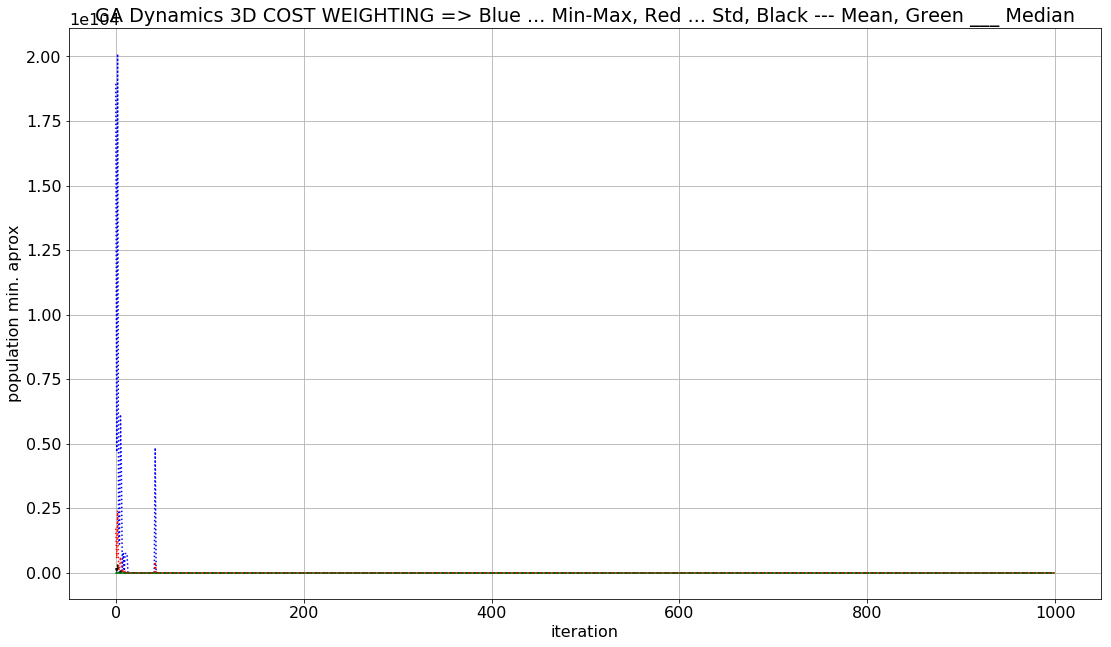

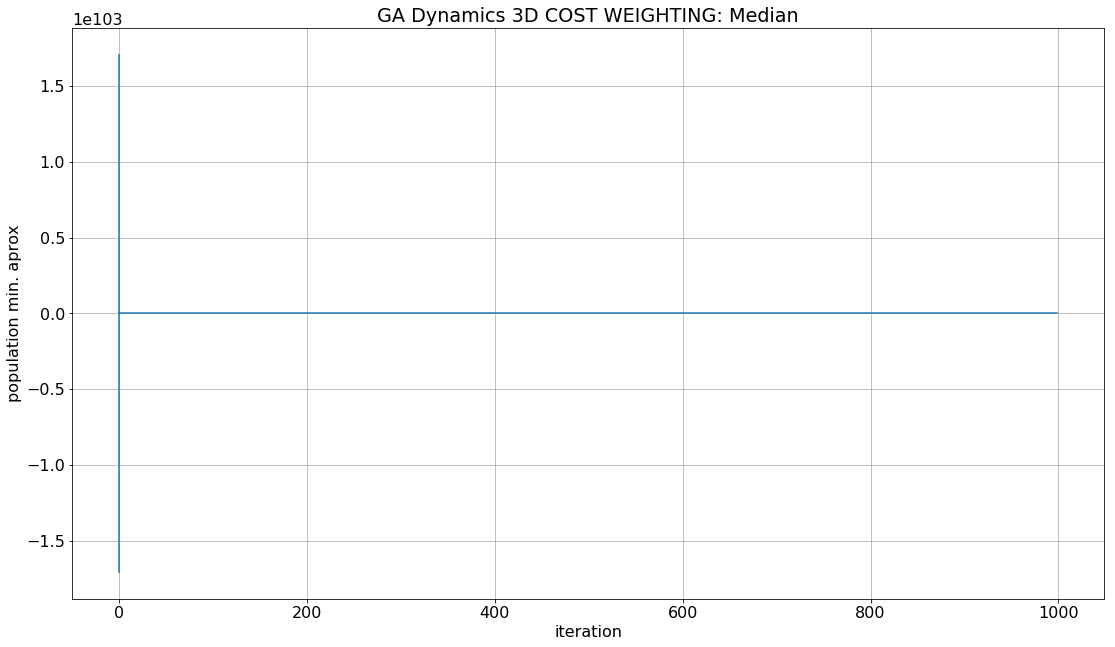

In [81]:
# Generate population
N = 128
minVal = 0
maxVal = UPPER_VAL_LIMIT
codeLen = 32
genQty = 3
d = codeLen * genQty
iterations = 1000
matingPercent = 0.7
mutaPercent = 0.003
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,
                                  minVal = minVal,
                                  maxVal = maxVal,
                                  codeLen = codeLen,
                                  genQty = genQty,
                                  funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    
    ordPop,ordFitVal,ordFitLst,costWeighting = ga.costWeighting(fitList,fitVal,Pop,keep = 1)
    pselect = ga.weightedSelection(ordPop, costWeighting, int(N/2))
    if i == (iterations - 1):
        # in last iteration children are equal to parents
        matingPercent = -1   
    children = ga.childenGen(pselect, matingPercent = matingPercent, mutaPercent = mutaPercent)
    Pop = children
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(fitVal, axis=0)))
print('Last Pop std: ' + str(np.std(fitVal, axis=0)))
print('Last Pop median: ' + str(np.median(fitVal, axis=0)))
print('Last Pop min: ' + str(np.amin(fitVal, axis=0)))
print('Last Pop max: ' + str(np.amax(fitVal, axis=0)))

print(fitList[np.argmin(fitList)])
print(fitVal[np.argmin(fitList)])

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D COST WEIGHTING => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsCostWeightingGA_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:20] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D COST WEIGHTING: Median")
plt.grid()
plt.savefig('DynamicsCostWeightingGAStd_3d.pdf', format='pdf')
plt.show()

# HAEA

 Iteration 999

Last fit info______
Last fit mean: 6.81492340569492
Last fit std: 0.0
Last fit median: 6.81492340569492
Last fit min: 6.81492340569492
Last fit max: 6.81492340569492
Last Pop info______
Last Pop mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Last Pop std: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Last Pop median: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1

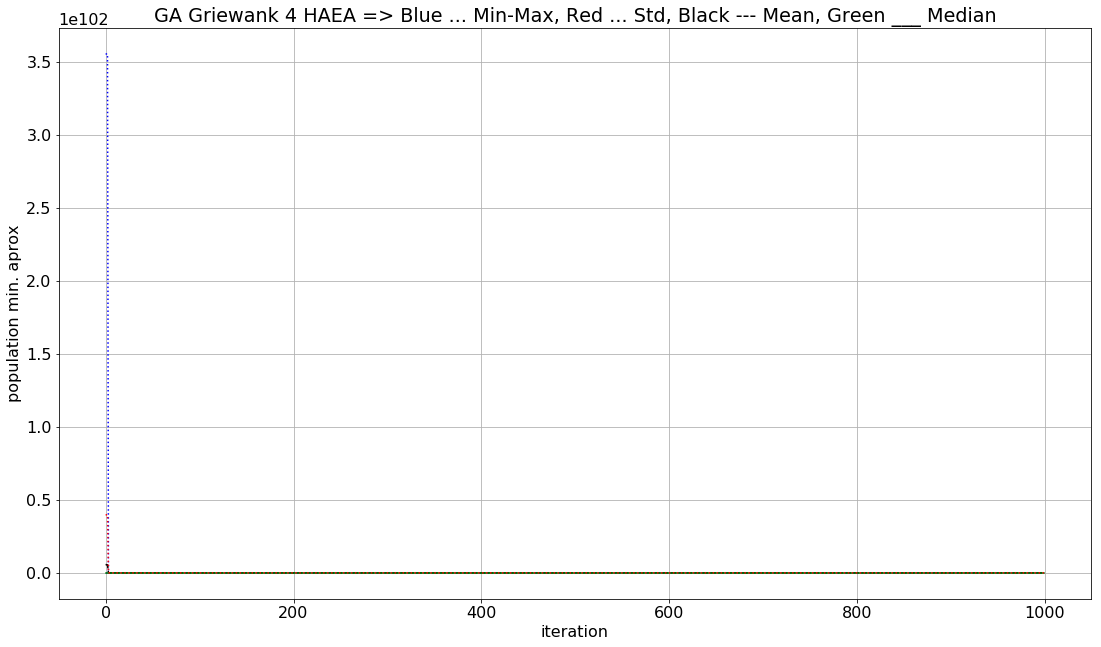

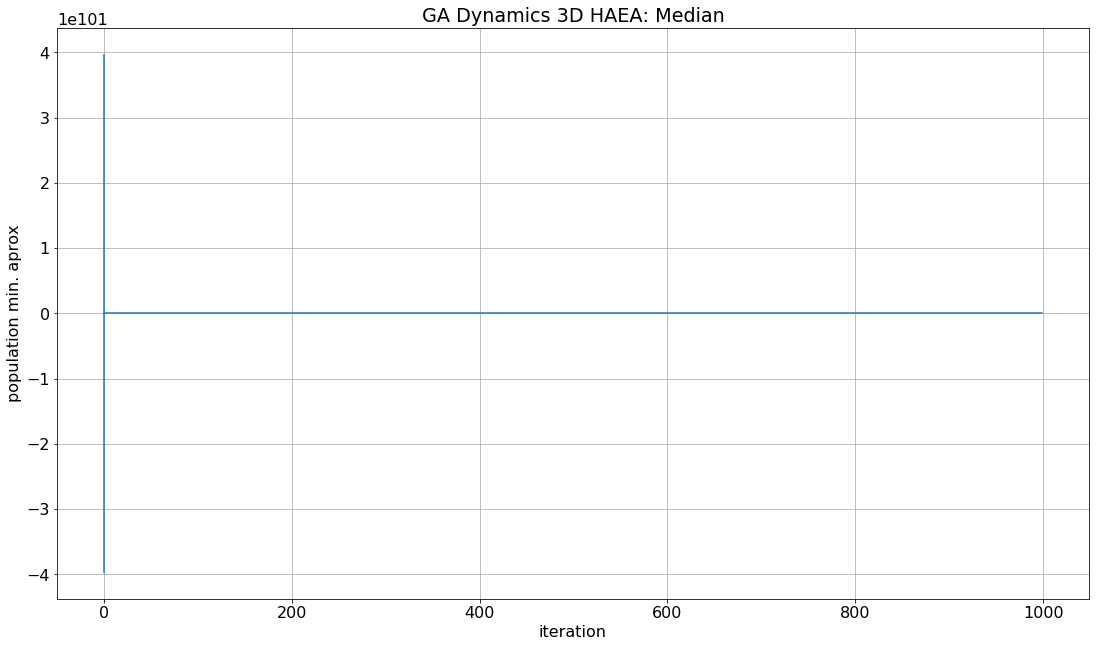

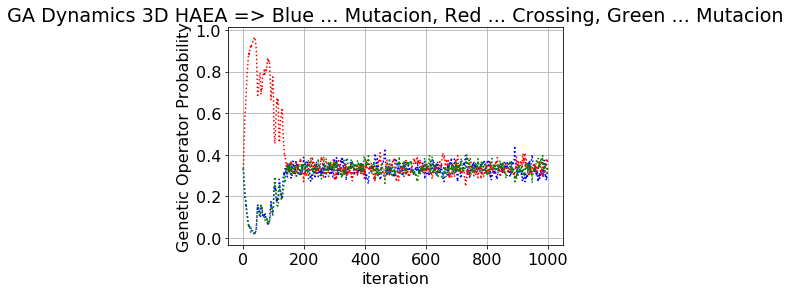

[[0.07147856 0.04163862 0.88688281]
 [0.24319027 0.57741627 0.17939346]
 [0.30852887 0.26361443 0.42785671]
 [0.10187905 0.50163844 0.39648252]
 [0.80448249 0.07953373 0.11598378]
 [0.40055501 0.33760692 0.26183807]
 [0.22787155 0.08651747 0.68561098]
 [0.31420309 0.09783954 0.58795737]
 [0.19753141 0.58075309 0.2217155 ]
 [0.15713593 0.64350964 0.19935443]
 [0.00246711 0.32120452 0.67632837]
 [0.5399632  0.21403746 0.24599934]
 [0.08050453 0.52023351 0.39926196]
 [0.29183074 0.63191251 0.07625675]
 [0.44753252 0.1321183  0.42034918]
 [0.24062472 0.00241563 0.75695965]
 [0.27099097 0.09009688 0.63891215]
 [0.09856373 0.55190185 0.34953442]
 [0.04580097 0.49072911 0.46346992]
 [0.83306146 0.13032593 0.03661261]
 [0.00357606 0.40705179 0.58937215]
 [0.24241077 0.57979332 0.17779591]
 [0.07944594 0.39141938 0.52913468]
 [0.03190192 0.73567355 0.23242454]
 [0.54400854 0.1337408  0.32225066]
 [0.14934713 0.43710695 0.41354592]
 [0.18288001 0.63452454 0.18259545]
 [0.34007708 0.02244094 0.63

In [82]:
# Generate population
N = 100
minVal = 0
maxVal = UPPER_VAL_LIMIT
codeLen = 32
genQty = 3
d = codeLen * genQty
# Not used
lnrate = 1
mutationP = 1/d
iterations = 1000
# Initial population
Pop = ga.pgenerator(N=N,d =d)
# print(Pop)
# Generation of inital random GA operator application probabilities
# 0: Mutation, 1: Mating
gopp = ga.pgenerator4Gop(N=N,d = 3)
# print(gopp)
# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
GOP_Matrix = np.zeros((3, iterations))
Iterations = []


for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    # Workout population fitness
    fitList,fitVal = ga.popfitnes(pop = Pop,
                                  minVal = minVal,
                                  maxVal = maxVal,
                                  codeLen = codeLen,
                                  genQty = genQty,
                                  funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    GOP_Matrix[0][i] = np.mean(gopp[:,0])
    GOP_Matrix[1][i] = np.mean(gopp[:,1])
    GOP_Matrix[2][i] = np.mean(gopp[:,2])
    pselect = ga.tournamentSelection(Pop, fitList, int(N/2))
    children,gopp = ga.haeaMin(Pop, pselect, gopp, fitList, zyz1CloseLoopBinString, mutationP, lnrate)
    
    Pop = children
    # print("New Population")
    # print(Pop)
    
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(Pop, axis=0)))
print('Last Pop std: ' + str(np.std(Pop, axis=0)))
print('Last Pop median: ' + str(np.median(Pop, axis=0)))
print('Last Pop min: ' + str(np.amin(Pop, axis=0)))
print('Last Pop max: ' + str(np.amax(Pop, axis=0)))

print(fitList[np.argmin(fitList)])
print(fitVal[np.argmin(fitList)]) 

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Griewank 4 HAEA => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('GriewankHaeaGA_2d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:5] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D HAEA: Median")
plt.grid()
plt.savefig('DynamicsHaeaGAStd_3d.pdf', format='pdf')
plt.show()


plt.plot(np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[0]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[1]),
         'r:',
         np.squeeze(Iterations),
         np.squeeze(GOP_Matrix[2]),
         'g:',)

plt.ylabel('Genetic Operator Probability')
plt.xlabel('iteration')
plt.title("GA Dynamics 3D HAEA => Blue ... Mutacion, Red ... Crossing, Green ... Mutacion")
plt.grid()
plt.savefig('geneticOperatorDynamics_3d.pdf', format='pdf')
plt.show()

print(gopp)

# Evolution strategies

 Iteration 199

Last fit info______
Last fit mean: 132411793291.23349
Last fit std: 1176801279.9988797
Last fit median: 132771373413.18726
Last fit min: 128430016638.3464
Last fit max: 133590671354.5384
Last Pop info______
Last Pop mean: [ 69.73448038 163.91166798  15.45661596]
Last Pop std: [1.83064795 0.87086506 0.13115402]
Last Pop median: [ 69.68757684 164.06157287  15.44918577]
Last Pop min: [ 65.92440022 161.44161417  15.1105636 ]
Last Pop max: [ 74.75006095 167.5039868   15.91324195]
128430016638.3464
[ 72.36364949 162.32163808  15.31053193]


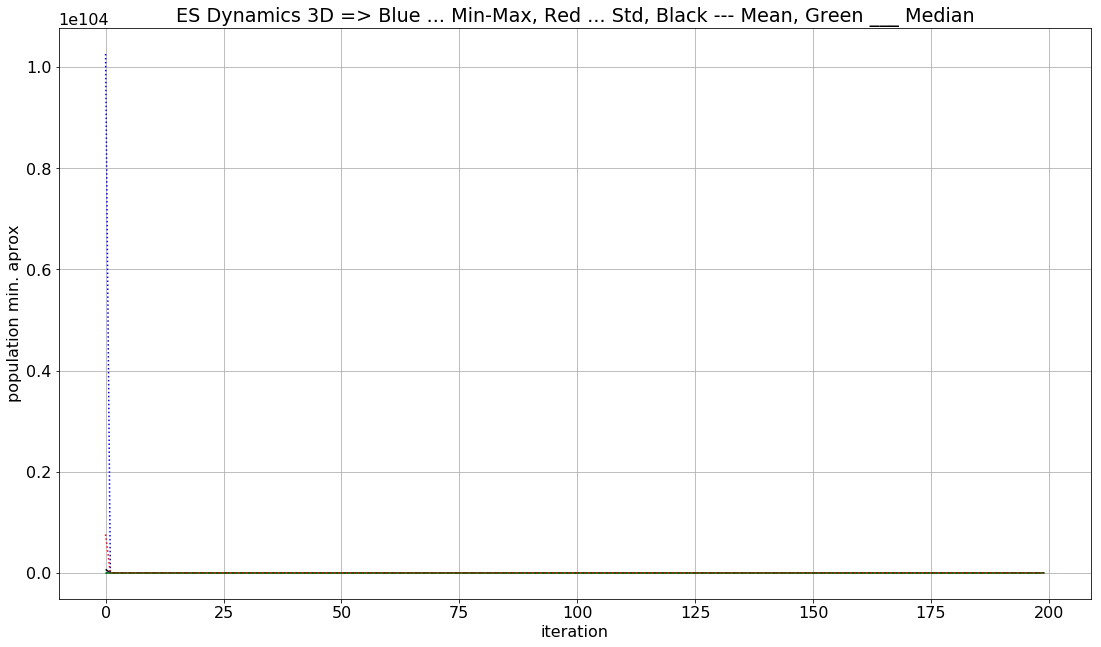

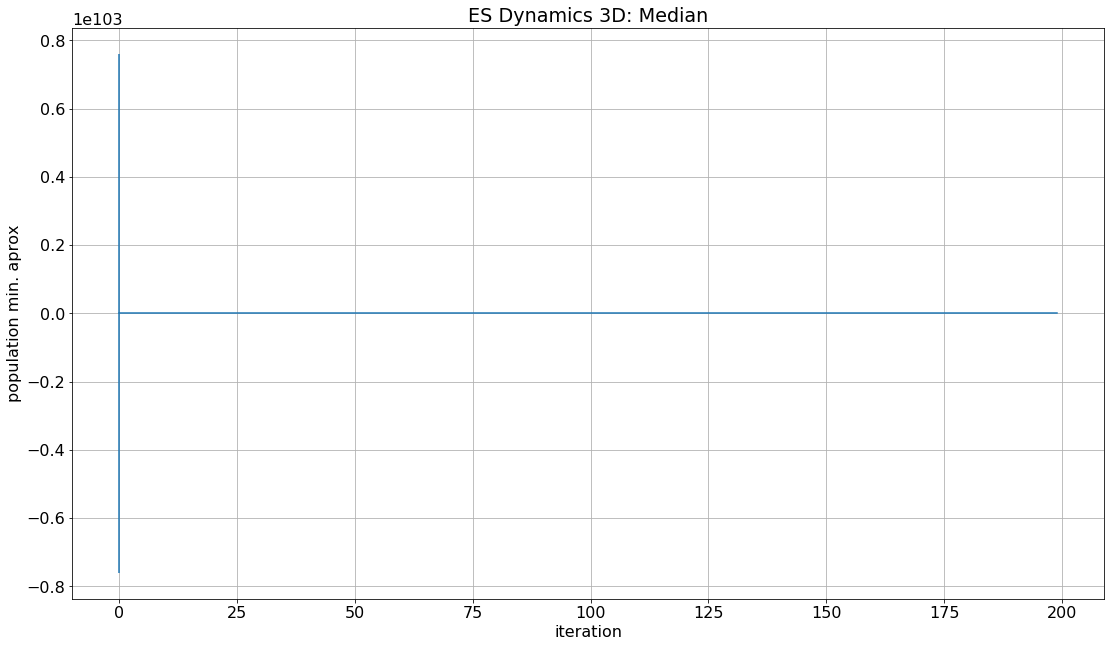

In [83]:
minVal = 0
maxVal = UPPER_VAL_LIMIT
iterations = 200
# Dimentions
d = 3
# Population
Np = 300
N = np.random.uniform(minVal,maxVal,(Np,d))
ns = np.random.uniform(0.01,0.2,(Np,d))

# M = np.random.uniform(0.01,1,(Np,d,d))
# ms = np.random.uniform(0.01,0.2,(Np,d,d))

# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []
for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    fitList = ga.popfitnes4ES(pop = N, funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    tournamentPairs = ga.tournamentSelectionIndexes(N, fitList, Np)
    # Reconbination and Mutation for children generation
    children_N,children_ns = ga.es_ChildrenGeneration(N,ns,tournamentPairs,minVal,maxVal)
    children_fitList = ga.popfitnes4ES(pop = children_N, funct = wrappedzyz1CloseLoop)
    
    newPop, newPop_s = ga.es_childreAndParentsSelection(N,ns,fitList,children_N,children_ns,children_fitList)
    
    N,ns = newPop, newPop_s
    
fitList = ga.popfitnes4ES(pop = N, funct = wrappedzyz1CloseLoop)
# print(fitList)
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(N, axis=0)))
print('Last Pop std: ' + str(np.std(N, axis=0)))
print('Last Pop median: ' + str(np.median(N, axis=0)))
print('Last Pop min: ' + str(np.amin(N, axis=0)))
print('Last Pop max: ' + str(np.amax(N, axis=0)))

print(fitList[np.argmin(fitList)])
print(N[np.argmin(fitList)])



# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("ES Dynamics 3D => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsES_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:10] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("ES Dynamics 3D: Median")
plt.grid()
plt.savefig('DynamicsESStd_10d.pdf', format='pdf')
plt.show()    

# Evolution strategies + Rotation Matrix

 Iteration 69

Last fit info______
Last fit mean: 190599654957.71008
Last fit std: 358425539.87732106
Last fit median: 190688506102.6373
Last fit min: 189658661163.20358
Last fit max: 190997380468.04337
Last Pop info______
Last Pop mean: [304.01558774 331.11210094  30.12760977]
Last Pop std: [4.39061071 0.74425212 0.09655664]
Last Pop median: [303.1926838  331.28082562  30.10689069]
Last Pop min: [292.61294083 328.27119958  29.93812038]
Last Pop max: [324.52527079 333.38695653  30.42694008]
189658661163.20358
[302.84434486 331.34168879  30.12663266]


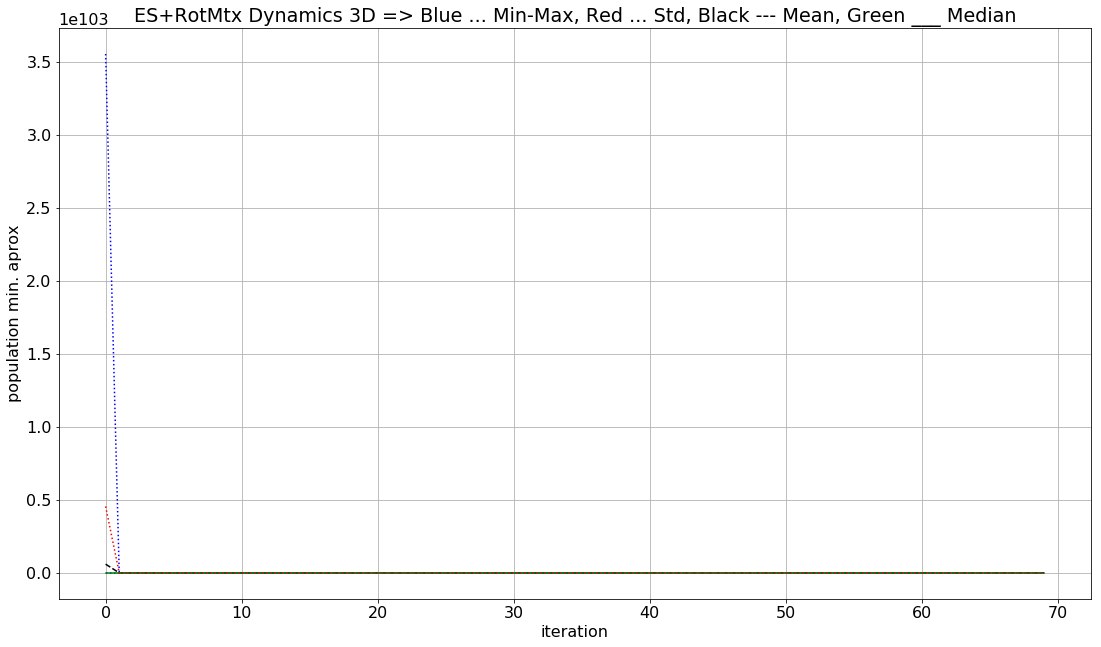

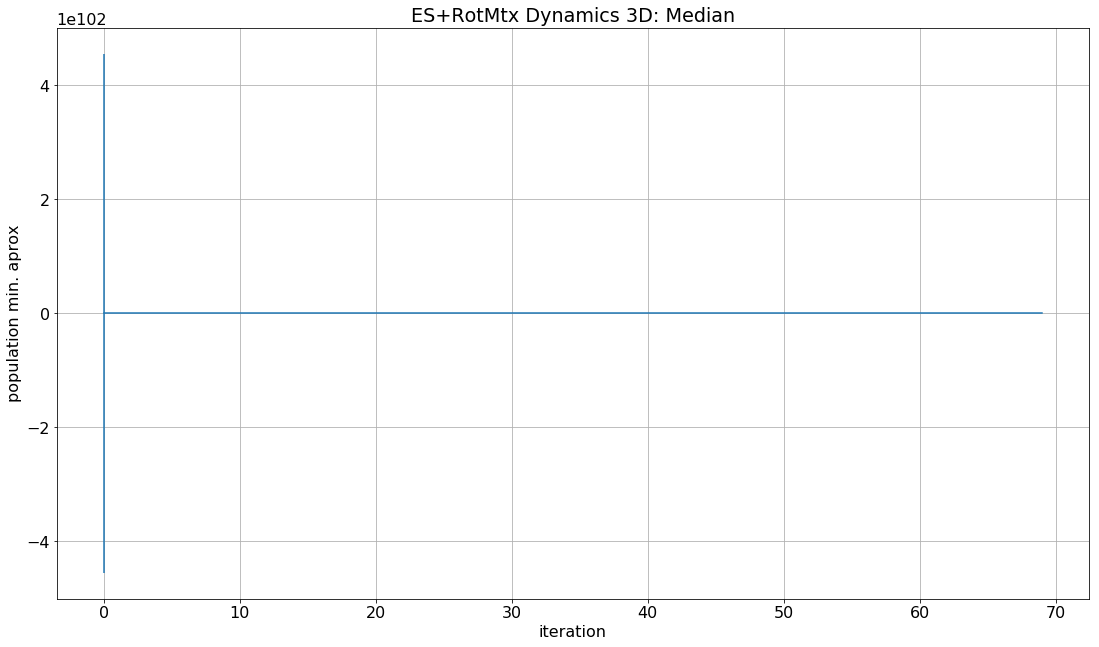

In [86]:
minVal = 0
maxVal = UPPER_VAL_LIMIT
iterations = 70
# Dimentions
d = 3
# Population
Np = 60
N = np.random.uniform(minVal,maxVal,(Np,d))
ns = np.random.uniform(0.01,0.2,(Np,d))
M = np.random.uniform(0.01,1,(Np,d,d))
ms = np.random.uniform(0.01,0.2,(Np,d,d))

# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
Iterations = []
for i in range(iterations):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()
    Iterations.append(i)
    fitList = ga.popfitnes4ES(pop = N, funct = wrappedzyz1CloseLoop)
    OUT_Matrix[0][i] = np.mean(fitList)
    OUT_Matrix[1][i] = np.median(fitList)
    OUT_Matrix[2][i] = np.max(fitList)
    OUT_Matrix[3][i] = np.min(fitList)
    OUT_Matrix[4][i] = np.std(fitList)
    tournamentPairs = ga.tournamentSelectionIndexes(N, fitList, Np)
    # Reconbination and Mutation for children generation
    children_N,children_ns,children_M,children_ms = ga.es_ChildrenGenerationMtx(N,ns,M,ms,tournamentPairs,minVal,maxVal)
    children_fitList = ga.popfitnes4ES(pop = children_N, funct = wrappedzyz1CloseLoop)
    
    newPop,newPop_s,newPop_M,newPop_ms = ga.es_childreAndParentsSelectionMtx(N,
                                                                             ns,
                                                                             M,
                                                                             ms,
                                                                             fitList,
                                                                             children_N,
                                                                             children_ns,
                                                                             children_M,
                                                                             children_ms,
                                                                             children_fitList)
    
    N,ns,M,ms = newPop,newPop_s,newPop_M,newPop_ms
    
fitList = ga.popfitnes4ES(pop = N, funct = wrappedzyz1CloseLoop)
# print(fitList)
# Last populatio fitness
print('\n')
print('Last fit info______')
print('Last fit mean: ' + str(np.mean(fitList)))
print('Last fit std: ' + str(np.std(fitList)))
print('Last fit median: ' + str(np.median(fitList)))
print('Last fit min: ' + str(np.amin(fitList)))
print('Last fit max: ' + str(np.amax(fitList)))
print('Last Pop info______')
print('Last Pop mean: ' + str(np.mean(N, axis=0)))
print('Last Pop std: ' + str(np.std(N, axis=0)))
print('Last Pop median: ' + str(np.median(N, axis=0)))
print('Last Pop min: ' + str(np.amin(N, axis=0)))
print('Last Pop max: ' + str(np.amax(N, axis=0)))

print(fitList[np.argmin(fitList)])
print(N[np.argmin(fitList)])
# print(fitVal[np.argmin(N)])

# multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[3]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'k--',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[1]),
         'g-',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[4]),
         'r:',)

plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("ES+RotMtx Dynamics 3D => Blue ... Min-Max, Red ... Std, Black --- Mean, Green ___ Median")
plt.grid()
plt.savefig('DynamicsESRotMtx_3d.pdf', format='pdf')
plt.show()

# Standard Deviation Plot
Ala = OUT_Matrix[4]
stdBarIndex = np.zeros((Ala.shape[0]))
stdBarIndex[0:Ala.shape[0]:5] = 1
truncated = Ala*stdBarIndex
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.errorbar(Iterations, OUT_Matrix[1], truncated)
plt.ylabel('population min. aprox')
plt.xlabel('iteration')
plt.title("ES+RotMtx Dynamics 3D: Median")
plt.grid()
plt.savefig('DynamicsESRotMtxStd_3d.pdf', format='pdf')
plt.show()